<a href="https://colab.research.google.com/github/siphemkngwn/hy/blob/main/paediatricsepsis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# Import Pandas

In [ ]:
import pandas as pd


In [ ]:
url='https://raw.githubusercontent.com/Kamaleswaran-Lab/The-2024-Pediatric-Sepsis-Challenge/refs/heads/main/SyntheticData_Training.csv'
df=pd.read_csv(url)
print(df)

      studyid_adm  agecalc_adm  height_cm_adm  weight_kg_adm  muac_mm_adm  \
0               1         16.8           79.8           11.6        150.0   
1               2         46.1           93.0           13.6        151.0   
2               3          7.9           68.2            8.2        148.0   
3               4         38.2           95.0           12.0        138.0   
4               5         16.1           83.0           12.0        165.0   
...           ...          ...            ...            ...          ...   
2681         2682         20.1           98.2           10.0        135.0   
2682         2683         26.8           82.3           10.0        140.0   
2683         2684         14.6           82.4           12.7        145.0   
2684         2685          9.5           67.5            7.5        130.0   
2685         2686         11.3           77.8            8.0        131.0   

      hr_bpm_adm  rr_brpm_app_adm  sysbp_mmhg_adm  diasbp_mmhg_adm  \
0    

# Show the whole list of columns

In [ ]:
column_list=df.columns.tolist()
print(column_list)

['studyid_adm', 'agecalc_adm', 'height_cm_adm', 'weight_kg_adm', 'muac_mm_adm', 'hr_bpm_adm', 'rr_brpm_app_adm', 'sysbp_mmhg_adm', 'diasbp_mmhg_adm', 'temp_c_adm', 'spo2site1_pc_oxi_adm', 'spo2site2_pc_oxi_adm', 'spo2other_adm', 'momage_adm', 'momagefirstpreg_adm', 'householdsize_adm', 'alivechildren_adm', 'deadchildren_adm', 'hematocrit_gpdl_adm', 'lactate_mmolpl_adm', 'lactate2_mmolpl_adm', 'glucose_mmolpl_adm', 'sqi1_perc_oxi_adm', 'sqi2_perc_oxi_adm', 'sex_adm', 'spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'bcseye_adm', 'bcsmotor_adm', 'bcsverbal_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20'

# Age Categories


In [ ]:
bins=[0,1,12,35,float('Inf')]
labels=['neonate','infant','toddler','preschool']
# Fix: Added include_lowest=True so that age=0 is included as 'neonate'
df['agecat']=pd.cut(df['agecalc_adm'],bins=bins,labels=labels,include_lowest=True)
print(df)
print(df.agecat)


      studyid_adm  agecalc_adm  height_cm_adm  weight_kg_adm  muac_mm_adm  \
0               1         16.8           79.8           11.6        150.0   
1               2         46.1           93.0           13.6        151.0   
2               3          7.9           68.2            8.2        148.0   
3               4         38.2           95.0           12.0        138.0   
4               5         16.1           83.0           12.0        165.0   
...           ...          ...            ...            ...          ...   
2681         2682         20.1           98.2           10.0        135.0   
2682         2683         26.8           82.3           10.0        140.0   
2683         2684         14.6           82.4           12.7        145.0   
2684         2685          9.5           67.5            7.5        130.0   
2685         2686         11.3           77.8            8.0        131.0   

      hr_bpm_adm  rr_brpm_app_adm  sysbp_mmhg_adm  diasbp_mmhg_adm  \
0    

In [ ]:
df.agecat.value_counts()

,count
agecat,
toddler,1414
infant,841
preschool,431
neonate,0


In [ ]:
df = df[df['agecat'] == 'infant']

# Categorize MUAC

In [ ]:
bins=[0,115,125,float('Inf')]

labels=['sam','mam','normal']
df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=bins,labels=labels)
print(df)
print(df.muac_cat)

      studyid_adm  agecalc_adm  height_cm_adm  weight_kg_adm  muac_mm_adm  \
2               3          7.9           68.2            8.2        148.0   
7               8          6.7           65.0            7.8        160.0   
8               9         10.7           65.0            5.9        118.0   
11             12          9.1           70.0            8.7        150.0   
12             13          8.1           64.0            6.0        115.0   
...           ...          ...            ...            ...          ...   
2674         2675          8.6           69.0            9.5        147.0   
2679         2680          9.3           65.0            7.0        158.0   
2680         2681          7.7           73.3            9.0        130.0   
2684         2685          9.5           67.5            7.5        130.0   
2685         2686         11.3           77.8            8.0        131.0   

      hr_bpm_adm  rr_brpm_app_adm  sysbp_mmhg_adm  diasbp_mmhg_adm  \
2    

# Categorise Fever

In [ ]:
bins=[0,36.5,37.5,float('Inf')]
labels=['hypothermia','normal_temp','fever']
df['temp_cat']=pd.cut(df['temp_c_adm'],bins=bins,labels=labels)
print(df)
print(df.temp_cat)

      studyid_adm  agecalc_adm  height_cm_adm  weight_kg_adm  muac_mm_adm  \
2               3          7.9           68.2            8.2        148.0   
7               8          6.7           65.0            7.8        160.0   
8               9         10.7           65.0            5.9        118.0   
11             12          9.1           70.0            8.7        150.0   
12             13          8.1           64.0            6.0        115.0   
...           ...          ...            ...            ...          ...   
2674         2675          8.6           69.0            9.5        147.0   
2679         2680          9.3           65.0            7.0        158.0   
2680         2681          7.7           73.3            9.0        130.0   
2684         2685          9.5           67.5            7.5        130.0   
2685         2686         11.3           77.8            8.0        131.0   

      hr_bpm_adm  rr_brpm_app_adm  sysbp_mmhg_adm  diasbp_mmhg_adm  \
2    

# See all Columns

In [ ]:
column_list=df.columns.tolist()
print(column_list)

['studyid_adm', 'agecalc_adm', 'height_cm_adm', 'weight_kg_adm', 'muac_mm_adm', 'hr_bpm_adm', 'rr_brpm_app_adm', 'sysbp_mmhg_adm', 'diasbp_mmhg_adm', 'temp_c_adm', 'spo2site1_pc_oxi_adm', 'spo2site2_pc_oxi_adm', 'spo2other_adm', 'momage_adm', 'momagefirstpreg_adm', 'householdsize_adm', 'alivechildren_adm', 'deadchildren_adm', 'hematocrit_gpdl_adm', 'lactate_mmolpl_adm', 'lactate2_mmolpl_adm', 'glucose_mmolpl_adm', 'sqi1_perc_oxi_adm', 'sqi2_perc_oxi_adm', 'sex_adm', 'spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'bcseye_adm', 'bcsmotor_adm', 'bcsverbal_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20'

# Resp Rate Category
### Show unique categories

In [ ]:
import numpy as np


In [ ]:
df['breaths'] = np.where((df.agecat=='neonate')&(df.rr_brpm_app_adm>=53),'tachypnea','normal')
df['breaths'] = np.where((df.agecat=='neonate')&((df.rr_brpm_app_adm>=29)&(df.rr_brpm_app_adm<=53)),'normal',df['breaths'])
df['breaths'] = np.where((df.agecat=='neonate')&(df.rr_brpm_app_adm<=29),'bradypnea',df['breaths'])
df['breaths'] = np.where((df.agecat=='infant')&(df.rr_brpm_app_adm<=29),'bradypnea',df['breaths'])
# Fix: Added missing parenthesis for consistency
df['breaths'] = np.where((df.agecat=='infant')&((df.rr_brpm_app_adm>=30)&(df.rr_brpm_app_adm<=53)),'normal',df['breaths'])
df['breaths'] = np.where((df.agecat=='infant')&(df.rr_brpm_app_adm>=53),'tachypnea',df['breaths'])
df['breaths'] = np.where((df.agecat=='toddler')&(df.rr_brpm_app_adm<=21),'bradypnea',df['breaths'])
df['breaths'] = np.where((df.agecat=='toddler')&((df.rr_brpm_app_adm>=22)&(df.rr_brpm_app_adm<=37)),'normal',df['breaths'])
df['breaths'] = np.where((df.agecat=='toddler')&(df.rr_brpm_app_adm>=37),'tachypnea',df['breaths'])
df['breaths'] = np.where((df.agecat=='preschool')&(df.rr_brpm_app_adm<=19),'bradypnea',df['breaths'])
df['breaths'] = np.where((df.agecat=='preschool')&((df.rr_brpm_app_adm>=20)&(df.rr_brpm_app_adm<=28)),'normal',df['breaths'])
df['breaths'] = np.where((df.agecat=='preschool')&(df.rr_brpm_app_adm>=28),'tachypnea',df['breaths'])


print(df.breaths)
df.breaths.unique()






2       tachypnea
7       tachypnea
8          normal
11         normal
12      tachypnea
          ...    
2674       normal
2679       normal
2680    tachypnea
2684       normal
2685       normal
Name: breaths, Length: 841, dtype: object


array(['tachypnea', 'normal'], dtype=object)

In [ ]:
print(df.breaths)

2       tachypnea
7       tachypnea
8          normal
11         normal
12      tachypnea
          ...    
2674       normal
2679       normal
2680    tachypnea
2684       normal
2685       normal
Name: breaths, Length: 841, dtype: object


# HR categories

In [ ]:
df['hrcat'] = np.where((df.agecat=='neonate')&(df.hr_bpm_adm<=205),'tachycardia','normal')
df['hrcat'] = np.where((df.agecat=='neonate')&((df.hr_bpm_adm>=90)&(df.hr_bpm_adm<=205)),'normal',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='neonate')&(df.hr_bpm_adm<=89),'bradycardia',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='infant')&(df.hr_bpm_adm<=89),'bradycardia',df['hrcat'])
# Fix: Added missing parenthesis for consistency
df['hrcat'] = np.where((df.agecat=='infant')&((df.hr_bpm_adm>=90)&(df.hr_bpm_adm<=190)),'normal',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='infant')&(df.hr_bpm_adm>=191),'tachycardia',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='toddler')&(df.hr_bpm_adm<=80),'bradycardia',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='toddler')&((df.hr_bpm_adm>=81)&(df.hr_bpm_adm<=140)),'normal',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='toddler')&(df.hr_bpm_adm>=141),'tachycardia',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='preschool')&(df.hr_bpm_adm<=65),'bradycardia',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='preschool')&((df.hr_bpm_adm>=66)&(df.hr_bpm_adm<=120)),'normal',df['hrcat'])
df['hrcat'] = np.where((df.agecat=='preschool')&(df.hr_bpm_adm>=121),'tachycardia',df['hrcat'])


In [ ]:
print(df.hrcat.unique())

['normal' 'tachycardia']


#Blood pressure - systolic

In [ ]:
df['bpsys'] = np.where((df.agecat=='neonate')&(df.sysbp_mmhg_adm>=85),'hypertension','normal')
df['bpsys'] = np.where((df.agecat=='neonate')&((df.sysbp_mmhg_adm>=67)&(df.sysbp_mmhg_adm<=84)),'normal',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='neonate')&(df.sysbp_mmhg_adm<=67),'hypotension',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='infant')&(df.sysbp_mmhg_adm<=71),'hypotension',df['bpsys'])
# Fix: Added missing parenthesis for consistency
df['bpsys'] = np.where((df.agecat=='infant')&((df.sysbp_mmhg_adm>=72)&(df.sysbp_mmhg_adm<=104)),'normal',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='infant')&(df.sysbp_mmhg_adm>=105),'hypertension',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='toddler')&(df.sysbp_mmhg_adm<=85),'hypotension',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='toddler')&((df.sysbp_mmhg_adm>=86)&(df.sysbp_mmhg_adm<=106)),'normal',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='toddler')&(df.sysbp_mmhg_adm>=107),'hypertension',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='preschool')&(df.sysbp_mmhg_adm<=88),'hypotension',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='preschool')&((df.sysbp_mmhg_adm>=89)&(df.sysbp_mmhg_adm<=112)),'normal',df['bpsys'])
df['bpsys'] = np.where((df.agecat=='preschool')&(df.sysbp_mmhg_adm>=113),'hypertension',df['bpsys'])

In [ ]:
print(df.bpsys.unique())

['normal' 'hypertension']


# Blood pressure - diastolic

In [ ]:
df['bpdias'] = np.where((df.agecat=='neonate')&(df.diasbp_mmhg_adm<=34),'low_diastolic','normal')
df['bpdias'] = np.where((df.agecat=='neonate')&((df.diasbp_mmhg_adm>=35)&(df.diasbp_mmhg_adm<=53)),'normal',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='neonate')&(df.diasbp_mmhg_adm >=54),'high_diastolic',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='infant')&(df.diasbp_mmhg_adm<=36),'low_diastolic',df['bpdias'])
# Fix: Added missing parenthesis for consistency
df['bpdias'] = np.where((df.agecat=='infant')&((df.diasbp_mmhg_adm>=37)&(df.diasbp_mmhg_adm<=56)),'normal',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='infant')&(df.diasbp_mmhg_adm>=63),'high_diastolic',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='toddler')&(df.diasbp_mmhg_adm<=41),'low_diastolic',df['bpdias'])
# Fix: Changed >=63 to <=63 for correct range (42-63)
df['bpdias'] = np.where((df.agecat=='toddler')&((df.diasbp_mmhg_adm>=42)&(df.diasbp_mmhg_adm<=63)),'normal',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='toddler')&(df.diasbp_mmhg_adm>=64),'high_diastolic',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='preschool')&(df.diasbp_mmhg_adm<=45),'low_diastolic',df['bpdias'])
# Fix: Changed <=46 to >=46 for correct range (46-72)
df['bpdias'] = np.where((df.agecat=='preschool')&((df.diasbp_mmhg_adm>=46)&(df.diasbp_mmhg_adm<=72)),'normal',df['bpdias'])
df['bpdias'] = np.where((df.agecat=='preschool')&(df.diasbp_mmhg_adm>=73),'high_diastolic',df['bpdias'])

# Capillary refill

In [ ]:
print(df.caprefill_adm.unique())

['No' 'Yes' nan]


# Temperature Category

In [ ]:
# Note: Temperature categorization was already done earlier, just checking the unique values
print(df.temp_cat.unique())

['normal_temp', 'fever', 'hypothermia', NaN]
Categories (3, object): ['hypothermia' < 'normal_temp' < 'fever']


#Hypoxia Categories with Sats of 90 cutoff

1.   List item
2.   List item



In [ ]:
bins=[0,90,float('Inf')]
labels=['hypoxia','normal_oxygenation']
df['sats_cat']=pd.cut(df['spo2site1_pc_oxi_adm'],bins=bins,labels=labels)


In [ ]:
print(df.sats_cat.unique())

['normal_oxygenation', 'hypoxia', NaN]
Categories (2, object): ['hypoxia' < 'normal_oxygenation']


# Hypoxia with Sats of 92 - cutoff

In [ ]:
bins=[0,92,float('Inf')]
labels=['hypoxia','normal_oxygenation']
df['sats_cat2']=pd.cut(df['spo2site1_pc_oxi_adm'],bins=bins,labels=labels)


In [ ]:
print(df.bcsmotor_adm.unique())

['Localizes painful stimulus' 'Withdraws limb from painful stimulus'
 'No response or inappropriate response']


#Blantyre score - replace values

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
value_map={
    'Localizes painful stimulus': 2,
    'Withdraws limb from painful stimulus': 1,
    'No response or inappropriate response': 0


}
df['bcsmotor_adm'] = df['bcsmotor_adm'].map(value_map)
df['bcsmotor_adm'] = df['bcsmotor_adm'].astype('Int64')

In [ ]:
print(df.bcsmotor_adm.unique())

<IntegerArray>
[2, 1, 0]
Length: 3, dtype: Int64


In [ ]:
print(df.bcseye_adm.unique())


['Watches or follows' 'Fails to watch or follow']


In [ ]:
value_map={
    'Watches or follows': 1,
    'Fails to watch or follow': 0
}



df['bcseye_adm'] = df['bcseye_adm'].map(value_map)
df['bcseye_adm'] = df['bcseye_adm'].astype('Int64')


In [ ]:
print(df.bcseye_adm.unique())


<IntegerArray>
[1, 0]
Length: 2, dtype: Int64


In [ ]:
print(df.bcsverbal_adm.unique())

['Cries appropriately with pain, or, if verbal, speaks'
 'Moan or abnormal cry with pain' 'No vocal response to pain' nan]


In [ ]:
value_map={
    'Cries appropriately with pain, or, if verbal,speaks': 2,
    'Moan or abnormal cry with pain': 1,
    'No cry'
:0}
df['bcsverbal_adm'] = df['bcsverbal_adm'].map(value_map)
df['bcsverbal_adm'] = df['bcsverbal_adm'].astype('Int64')

# Blantyre Score

In [ ]:
df['blantyre_score'] = df['bcsmotor_adm'] + df['bcseye_adm'] + df['bcsverbal_adm']

In [ ]:
df['midblantyre_score'] = df['bcsmotor_adm'] + df['bcseye_adm']

In [ ]:
print(df.blantyre_score.unique())


<IntegerArray>
[<NA>, 3, 2, 1]
Length: 4, dtype: Int64


In [ ]:
print(df['blantyre_score'])

2       <NA>
7       <NA>
8       <NA>
11      <NA>
12      <NA>
        ... 
2674    <NA>
2679    <NA>
2680    <NA>
2684    <NA>
2685    <NA>
Name: blantyre_score, Length: 841, dtype: Int64


#Blantyre Score Category

In [ ]:
bins=[0,5,float('Inf')]
labels=['low_score','normal']
df['bcs_cat']=pd.cut(df['blantyre_score'],bins=bins,labels=labels)


<Axes: xlabel='blantyre_score'>

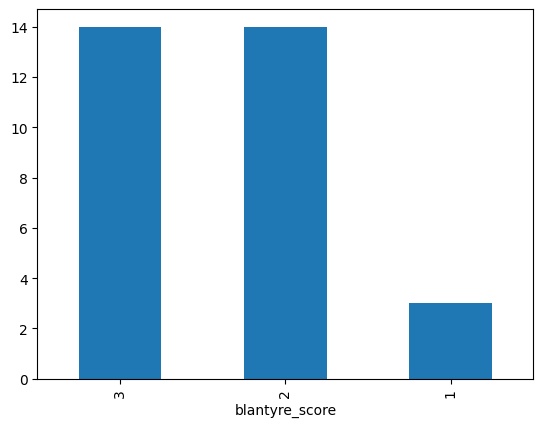

In [ ]:
df['blantyre_score'].value_counts().plot(kind='bar')


In [ ]:
print(df.bcs_cat.unique())

[NaN, 'low_score']
Categories (2, object): ['low_score' < 'normal']


# Malnutrition

In [ ]:
print(df.agecalc_adm)

2        7.9
7        6.7
8       10.7
11       9.1
12       8.1
        ... 
2674     8.6
2679     9.3
2680     7.7
2684     9.5
2685    11.3
Name: agecalc_adm, Length: 841, dtype: float64


In [ ]:
import pandas as pd


# Nutrition z scores

In [ ]:
df['agecalc_adm'].isnull().sum()

np.int64(0)

In [ ]:
df['weight_kg_adm'].isnull().sum()

np.int64(0)

In [ ]:
print(df.sex_adm.unique())

['Male' 'Female']


In [ ]:
df['sex_adm']=df['sex_adm'].str.lower()

In [ ]:
print(df.sex_adm.unique())

['male' 'female']


# Malnutrition (WHZ)

#malnutrition np.where

In [ ]:
import numpy as np


In [ ]:
def categorize_whz(row):
    sex = row['sex_adm']
    height = row['height_cm_adm']
    weight = row['weight_kg_adm']

    if sex == 'f':
        if height == 45 and weight <= 1.9:
            return 'z-3'
        elif height == 45 and weight <= 2.1:
            return 'z-2'
        # ... add other rules for female ...
    elif sex == 'm':
        if height == 45 and weight <= 1.9:
            return 'z-3'
        elif height == 45 and weight <= 2.1:
            return 'z-2'


In [ ]:
import numpy as np

In [ ]:
df['whz'] = np.where(
    (df.sex_adm=='f') & (df.height_cm_adm==48) & (df.weight_kg_adm<=2.3), 'z-3',  # Condition for z-3
    np.where(
        (df.sex_adm=='f') & (df.height_cm_adm==48) & (df.weight_kg_adm<=2.5), 'z-2',  # Condition for z-2
        np.where(
            (df.sex_adm=='f') & (df.height_cm_adm==48) & (df.weight_kg_adm<=2.6), 'z-2',  # Condition for z-2 (height 46)
            np.where(
                (df.sex_adm=='f') & (df.height_cm_adm==49) & (df.weight_kg_adm<=2.4), 'z-2',  # Condition for z-2 (height 47)
                df['whz']  # Otherwise, keep the existing 'normal' value
            )
        )
    )
)


KeyError: 'whz'

In [ ]:
df.whz.unique()

In [ ]:
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&((df.height_cm_adm==49)&(df.weight_kg_adm<=2.4)),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==49)& (df.weight_kg_adm<=2.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==49)&(df.weight_kg_adm>=2.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&((df.height_cm_adm==50)&(df.weight_kg_adm<=3)),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==50)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm<=2.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm<=3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm<=2.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm<=3.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm>=3.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm<=3.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm<=3.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==45)&(df.weight_kg_adm<=1.9),'z-3','normal')
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==45)&(df.weight_kg_adm<=2.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm<=47)& (df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==47)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm>=3.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm<=3.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm<=4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm>=4.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm<=3.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm>=4.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm>=4.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm>=4.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm>=5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm<=4.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm<=5.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm>=5.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm<=4.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm>=5.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm<=5.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm<=5.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm<=5.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm<=6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm<=5.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm<=6.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm>=6.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm<=5.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm<=6.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm>=6.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm>=6.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm>=7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm<=6.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm<=7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm>=7.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm<=6.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm>=7.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm<=6.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm>=7.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm<=6.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm<=7.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm>=7.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm>=7.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm<=7.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm<=8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm>=8.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm<=7.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm<=8.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm>=8.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm<=7.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm>=8.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm<=7.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm>=8.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm<=8.0),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm<=8.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm>=8.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm>=8.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm<=8.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm<=9.0),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm<=8.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm<=9.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm>=9.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm<=8.7),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm<=9.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm<=8.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm<=8.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm>=8.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.0),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm>=10),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==88)&(df.weight_kg_adm<=9.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==88)&(df.weight_kg_adm<=10.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==89)&(df.weight_kg_adm<=9.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==89)&(df.weight_kg_adm<=10.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==90)&(df.weight_kg_adm<=9.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==91)&(df.weight_kg_adm<=9.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==91)&(df.weight_kg_adm<=10.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==93)&(df.weight_kg_adm<=10.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==93)&(df.weight_kg_adm<=11.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==94)&(df.weight_kg_adm<=10.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==94)&(df.weight_kg_adm<=11.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==95)&(df.weight_kg_adm<=10.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==95)&(df.weight_kg_adm<=11.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==96)&(df.weight_kg_adm<=10.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==96)&(df.weight_kg_adm<=11.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==97)&(df.weight_kg_adm<=12),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==98)&(df.weight_kg_adm<=11.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==98)&(df.weight_kg_adm<=12.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==99)&(df.weight_kg_adm<=11.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==99)&(df.weight_kg_adm<=12.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==100)&(df.weight_kg_adm<=11.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==101)&(df.weight_kg_adm<=11.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==102)&(df.weight_kg_adm<=12),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==102)&(df.weight_kg_adm<=13.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==103)&(df.weight_kg_adm<=12.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==103)&(df.weight_kg_adm<=13.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==104)&(df.weight_kg_adm<=12.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==104)&(df.weight_kg_adm<=13.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==105)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==105)&(df.weight_kg_adm<=13.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==106)&(df.weight_kg_adm<=13),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==106)&(df.weight_kg_adm<=14.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==107)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==107)&(df.weight_kg_adm<=13.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==108)&(df.weight_kg_adm<=13.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==108)&(df.weight_kg_adm<=14.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==109)&(df.weight_kg_adm<=13.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==109)&(df.weight_kg_adm<=15),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==110)&(df.weight_kg_adm<=14),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==110)&(df.weight_kg_adm<=15.3),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm<=14.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm<=15.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm>=14.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm<=14.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm<=15.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm>=15.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm<=15.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm<=16.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm>=16.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm<=15.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm<=16.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm>=16.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm<=15.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm>=17.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm<=17.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm>=17.6),'normal',df['whz'])
df['whz']=np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm<=16.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm<=17.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm<=16.6),'z-3',df['whz'])
df['whz']=np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm<=18.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm>=18.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm<=16.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm<=20.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm>=20.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm<=17.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm<=18.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.7),'normal',df['whz'])











df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm<=1.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm>=2.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm>=2.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm>=2.4),'normal',df['whz'])
df['whz']=np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm<=2.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm>=2.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm<=2.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm<=3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=2.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm>=3.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm>=3.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm<=3.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm<=4.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm>=4.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm>=4.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm <=4.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm>=2.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm>=4.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm<=5.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm<=4.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm<=5.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm>=5.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm>=5.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=5.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm<=7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm<=7.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm>=7.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm<=6.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm<=7.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm>=7.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm>=7.7),'normal',df['whz'])

df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm>=7.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm<=8.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm>=8.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm<=8.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm<=7.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm<=8.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm>=7.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm<=8.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm>=8.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm>=8.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm>=9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=8.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=9.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=9.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm<=9.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm>=9.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=8.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==84)&(df.weight_kg_adm<=8.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==84)&(df.weight_kg_adm>=9.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=9.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=10),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=10.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm<=10.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm>=10.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=9.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=10.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=10.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=9.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=10.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=9.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm>=11),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm<=10.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm<=11),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm>=9.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm<=11.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm>=11.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm<=10.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm<=11.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm>=11.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm<=10.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm<=11.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm>=11.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm<=11.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm<=12),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm>=12.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm<=11.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm<=12.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm>=12.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11.4),'z-3',df['whz'])
df['whz']=np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm>=12.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm<=11.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm<=12.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm>=12.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm<=11.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm>=12.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.1),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=13.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=13.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=11.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=12.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=13.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm<=12.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm<=13.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm>=13.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm<=12.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm<=13.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm>=14),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm<=13),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm<=14.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm>=14.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=13.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=14.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=14.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm<=13.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm<=14.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm>=14.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm<=13.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm<=14.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm>=15),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=14),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=15.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=14),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm<=14.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm<=15.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm>=15.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm<=14.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm<=15.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm>=16),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm<=14.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm<=16.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm>=16.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm<=15.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm<=16.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm>=16.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm<=15.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm<=16.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm>=16.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=15.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==116)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm<=16.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm<=18),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm>=18.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm<=16.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm<=18.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm>=18.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=17.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.7),'normal',df['whz'])



SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (ipython-input-51-1487486665.py, line 24)

In [ ]:
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==48)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&((df.height_cm_adm==49)&(df.weight_kg_adm<=2.4)),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==49)& (df.weight_kg_adm<=2.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==49)&(df.weight_kg_adm>=2.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&((df.height_cm_adm==50)&(df.weight_kg_adm<=3)),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==50)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm<=2.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm<=3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==51)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm<=2.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm<=3.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==53)&(df.weight_kg_adm>=3.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm<=3.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm<=3.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==45)&(df.weight_kg_adm<=1.9),'z-3','normal')
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==45)&(df.weight_kg_adm<=2.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm<=47)& (df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==47)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
adm=='f')&(df.height_cm_adm==55)&(df.weight_kg_adm>=3.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm<=3.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm<=4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==56)&(df.weight_kg_adm>=4.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm<=3.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==57)&(df.weight_kg_adm>=4.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==58)&(df.weight_kg_adm>=4.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==59)&(df.weight_kg_adm>=4.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==60)&(df.weight_kg_adm>=5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm<=4.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm<=5.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==61)&(df.weight_kg_adm>=5.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm<=4.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==62)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==63)&(df.weight_kg_adm>=5.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm<=5.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm<=5.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm<=5.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm<=6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm<=5.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm<=6.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==66)&(df.weight_kg_adm>=6.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm<=5.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm<=6.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==68)&(df.weight_kg_adm>=6.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==69)&(df.weight_kg_adm>=6.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==70)&(df.weight_kg_adm>=7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm<=6.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm<=7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==71)&(df.weight_kg_adm>=7.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm<=6.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==72)&(df.weight_kg_adm>=7.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm<=6.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==73)&(df.weight_kg_adm>=7.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm<=6.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm<=7.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==75)&(df.weight_kg_adm>=7.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==76)&(df.weight_kg_adm>=7.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm<=7.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm<=8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==77)&(df.weight_kg_adm>=8.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm<=7.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm<=8.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==78)&(df.weight_kg_adm>=8.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm<=7.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==79)&(df.weight_kg_adm>=8.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm<=7.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==80)&(df.weight_kg_adm>=8.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm<=8.0),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm<=8.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==81)&(df.weight_kg_adm>=8.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==82)&(df.weight_kg_adm>=8.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm<=8.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm<=9.0),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm<=8.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm<=9.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==84)&(df.weight_kg_adm>=9.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm<=8.7),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm<=9.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm<=8.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm<=8.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==86)&(df.weight_kg_adm>=8.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.0),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==87)&(df.weight_kg_adm>=10),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==88)&(df.weight_kg_adm<=9.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==88)&(df.weight_kg_adm<=10.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==89)&(df.weight_kg_adm<=9.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==89)&(df.weight_kg_adm<=10.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==90)&(df.weight_kg_adm<=9.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==91)&(df.weight_kg_adm<=9.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==91)&(df.weight_kg_adm<=10.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==93)&(df.weight_kg_adm<=10.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==93)&(df.weight_kg_adm<=11.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==94)&(df.weight_kg_adm<=10.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==94)&(df.weight_kg_adm<=11.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==95)&(df.weight_kg_adm<=10.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==95)&(df.weight_kg_adm<=11.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==96)&(df.weight_kg_adm<=10.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==96)&(df.weight_kg_adm<=11.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==97)&(df.weight_kg_adm<=12),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==98)&(df.weight_kg_adm<=11.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==98)&(df.weight_kg_adm<=12.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==99)&(df.weight_kg_adm<=11.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==99)&(df.weight_kg_adm<=12.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==100)&(df.weight_kg_adm<=11.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==101)&(df.weight_kg_adm<=11.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==102)&(df.weight_kg_adm<=12),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==102)&(df.weight_kg_adm<=13.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==103)&(df.weight_kg_adm<=12.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==103)&(df.weight_kg_adm<=13.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==104)&(df.weight_kg_adm<=12.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==104)&(df.weight_kg_adm<=13.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==105)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==105)&(df.weight_kg_adm<=13.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==106)&(df.weight_kg_adm<=13),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==106)&(df.weight_kg_adm<=14.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==107)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==107)&(df.weight_kg_adm<=13.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==108)&(df.weight_kg_adm<=13.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==108)&(df.weight_kg_adm<=14.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==109)&(df.weight_kg_adm<=13.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==109)&(df.weight_kg_adm<=15),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==110)&(df.weight_kg_adm<=14),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==110)&(df.weight_kg_adm<=15.3),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm<=14.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm<=15.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==111)&(df.weight_kg_adm>=14.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm<=14.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm<=15.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==112)&(df.weight_kg_adm>=15.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm<=15.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm<=16.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==113)&(df.weight_kg_adm>=16.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm<=15.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm<=16.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==114)&(df.weight_kg_adm>=16.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm<=15.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==115)&(df.weight_kg_adm>=17.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm<=17.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==116)&(df.weight_kg_adm>=17.6),'normal',df['whz'])
df['whz']=np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm<=16.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm<=17.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm<=16.6),'z-3',df['whz'])
df['whz']=np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm<=18.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==118)&(df.weight_kg_adm>=18.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm<=16.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm<=20.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==119)&(df.weight_kg_adm>=20.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm<=17.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm<=18.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='f')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm<=1.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm>=2.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==45)&(df.weight_kg_adm>=2.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm<=2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==46)&(df.weight_kg_adm>=2.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm<=2.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==47)&(df.weight_kg_adm>=2.4),'normal',df['whz'])
df['whz']=np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm<=2.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==48)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm<=2.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==49)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm<=2.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==50)&(df.weight_kg_adm>=2.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm<=2.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm<=3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==51)&(df.weight_kg_adm>=3.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=2.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==52)&(df.weight_kg_adm>=3.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm<=3.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==53)&(df.weight_kg_adm>=3.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==54)&(df.weight_kg_adm>=3.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm<=3.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==55)&(df.weight_kg_adm>=3.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm<=3.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm<=4.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==56)&(df.weight_kg_adm>=4.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm<=4.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==57)&(df.weight_kg_adm>=4.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm<=4.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm <=4.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==58)&(df.weight_kg_adm>=2.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm<=4.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==59)&(df.weight_kg_adm>=4.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm<=4.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm<=5.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==60)&(df.weight_kg_adm>=2.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm<=4.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm<=5.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==61)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm<=5.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==62)&(df.weight_kg_adm>=5.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm<=5.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==63)&(df.weight_kg_adm>=5.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=5.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==64)&(df.weight_kg_adm>=6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=5.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==65)&(df.weight_kg_adm>=6.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==67)&(df.weight_kg_adm>=6.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm<=6.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==68)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm<=6.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm<=7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==69)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm<=6.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm<=7.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==70)&(df.weight_kg_adm>=7.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm<=6.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm<=7.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==71)&(df.weight_kg_adm>=7.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm<=7.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==72)&(df.weight_kg_adm>=7.7),'normal',df['whz'])

df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm<=7.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==73)&(df.weight_kg_adm>=7.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=7.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==74)&(df.weight_kg_adm>=8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm<=7.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm<=8.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==75)&(df.weight_kg_adm>=8.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm<=7.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm<=8.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==76)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm<=7.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm<=8.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==77)&(df.weight_kg_adm>=2.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm>=7.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm<=8.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==78)&(df.weight_kg_adm>=8.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm<=8.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==79)&(df.weight_kg_adm>=8.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm<=8.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==80)&(df.weight_kg_adm>=9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=8.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=9.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==81)&(df.weight_kg_adm>=9.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm<=8.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm<=9.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==82)&(df.weight_kg_adm>=9.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=8.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==83)&(df.weight_kg_adm>=9.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==84)&(df.weight_kg_adm<=8.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==84)&(df.weight_kg_adm>=9.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==85)&(df.weight_kg_adm>=9.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=9.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=10),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==86)&(df.weight_kg_adm>=10.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm<=9.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm<=10.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==87)&(df.weight_kg_adm>=10.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=9.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=10.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==88)&(df.weight_kg_adm>=10.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=9.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=10.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==89)&(df.weight_kg_adm>=9.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm<=10.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==90)&(df.weight_kg_adm>=11),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm<=10.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm<=11),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==91)&(df.weight_kg_adm>=9.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm<=10.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm<=11.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==92)&(df.weight_kg_adm>=11.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm<=10.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm<=11.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==93)&(df.weight_kg_adm>=11.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm<=10.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm<=11.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==94)&(df.weight_kg_adm>=11.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm<=11.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm<=12),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==95)&(df.weight_kg_adm>=12.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm<=11.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm<=12.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==96)&(df.weight_kg_adm>=12.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11.4),'z-3',df['whz'])
df['whz']=np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm<=11.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==97)&(df.weight_kg_adm>=12.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm<=11.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm<=12.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==98)&(df.weight_kg_adm>=12.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm<=11.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm<=12.7),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==99)&(df.weight_kg_adm>=12.8),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==100)&(df.weight_kg_adm<=12.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.1),'z-3',df['whz'])

df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=12.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=13.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==101)&(df.weight_kg_adm<=13.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=11.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=12.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==102)&(df.weight_kg_adm<=13.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm<=12.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm<=13.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==103)&(df.weight_kg_adm>=13.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm<=12.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm<=13.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==104)&(df.weight_kg_adm>=14),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm<=13),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm<=14.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==105)&(df.weight_kg_adm>=14.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=13.3),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=14.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==106)&(df.weight_kg_adm>=14.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm<=13.5),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm<=14.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==107)&(df.weight_kg_adm>=14.7),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm<=13.7),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm<=14.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==108)&(df.weight_kg_adm>=15),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=14),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=15.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==109)&(df.weight_kg_adm>=14),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm<=14.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm<=15.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==110)&(df.weight_kg_adm>=15.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm<=14.6),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm<=15.9),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==111)&(df.weight_kg_adm>=16),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm<=14.9),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm<=16.2),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==112)&(df.weight_kg_adm>=16.3),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm<=15.2),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm<=16.5),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==113)&(df.weight_kg_adm>=16.6),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm<=15.4),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm<=16.8),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==114)&(df.weight_kg_adm>=16.9),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=15.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.1),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==115)&(df.weight_kg_adm<=17.2),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==116)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm<=16),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.4),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==117)&(df.weight_kg_adm>=17.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm<=16.5),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm<=18),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==118)&(df.weight_kg_adm>=18.1),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm<=16.8),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm<=18.3),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==119)&(df.weight_kg_adm>=18.4),'normal',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=17.1),'z-3',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.6),'z-2',df['whz'])
df['whz'] = np.where((df.sex_adm=='m')&(df.height_cm_adm==120)&(df.weight_kg_adm>=18.7),'normal',df['whz'])





















SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (ipython-input-52-3159129035.py, line 24)

In [ ]:
df.whz.unique()

In [ ]:
print(df.sex_adm.unique())

In [ ]:
df.whz.unique()

#Machine learning and Nas

In [ ]:
dfa= df.dropna()


In [ ]:
num_rows,num_cols=dfa.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
dfb=df.dropna()
num_rows,num_cols=dfb.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
dfb.shape

In [ ]:
dfc=df.drop('lactate2_mmolpl_adm',axis=1)
num_rows,num_cols=dfc.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


In [ ]:
dfd=dfc.drop('sqi2_perc_oxi_adm',axis=1)
num_rows,num_cols=dfd.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
de=dfd.lactate_mmolpl_adm.dropna()
num_rows,num_cols=dfd.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
nan_counts = de.isnull().sum()
print(nan_counts)

In [ ]:
de.head()

In [ ]:
dg = dfd.dropna(subset=['lactate_mmolpl_adm'])
num_rows,num_cols=dfd.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
nan_counts = dg.isnull().sum()
sorted_columns = nan_counts.sort_values(ascending=False).index.tolist()
print(sorted_columns)

In [ ]:
dh = dg.select_dtypes(include=['object', 'category']).columns.tolist()
print(dh)

# Hot encoding (creating categorical variables)

In [ ]:
dj=pd.get_dummies(dh,columns=['sex_adm','spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20', 'admitabx_adm___21', 'bcgscar_adm', 'vaccmeasles_adm', 'vaccmeaslessource_adm', 'vaccpneumoc_adm', 'vaccpneumocsource_adm', 'vaccdpt_adm', 'vaccdptsource_adm', 'priorweekabx_adm', 'priorweekantimal_adm', 'symptoms_adm___1', 'symptoms_adm___2', 'symptoms_adm___3', 'symptoms_adm___4', 'symptoms_adm___5', 'symptoms_adm___6', 'symptoms_adm___7', 'symptoms_adm___8', 'symptoms_adm___9', 'symptoms_adm___10', 'symptoms_adm___11', 'symptoms_adm___12', 'symptoms_adm___13', 'symptoms_adm___14', 'symptoms_adm___15', 'symptoms_adm___16', 'symptoms_adm___17', 'symptoms_adm___18', 'comorbidity_adm___1', 'comorbidity_adm___2', 'comorbidity_adm___3', 'comorbidity_adm___4', 'comorbidity_adm___5', 'comorbidity_adm___6', 'comorbidity_adm___7', 'comorbidity_adm___8', 'comorbidity_adm___9', 'comorbidity_adm___10', 'comorbidity_adm___11', 'comorbidity_adm___12', 'priorhosp_adm', 'prioryearwheeze_adm', 'prioryearcough_adm', 'diarrheaoften_adm', 'tbcontact_adm', 'feedingstatus_adm', 'exclbreastfed_adm', 'nonexclbreastfed_adm', 'totalbreastfed_adm', 'deliveryloc_adm', 'birthattend_adm', 'duedateknown_adm', 'birthdetail_adm___1', 'birthdetail_adm___2', 'birthdetail_adm___3', 'birthdetail_adm___4', 'birthdetail_adm___5', 'birthdetail_adm___6', 'travelmethod_adm', 'traveldist_adm', 'badhealthduration_adm', 'caregiverage_adm', 'caregivermarried_adm', 'momalive_adm', 'momageknown_adm', 'momagefirstpregknown_adm', 'momedu_adm', 'momhiv_adm', 'watersource_adm', 'waterpure_adm', 'cookfuel_adm___1', 'cookfuel_adm___2', 'cookfuel_adm___3', 'cookfuel_adm___4', 'cookfuel_adm___5', 'cookfuel_adm___6', 'cookfuel_adm___7', 'cookfuel_adm___8', 'cookloc_adm', 'lightfuel_adm', 'tobacco_adm', 'bednet_adm', 'hctpretransfusion_adm', 'hivstatus_adm', 'malariastatuspos_adm', 'caregiver_adm_new', 'agecat', 'muac_cat', 'temp_cat', 'breaths', 'hrcat', 'bpsys', 'bpdias', 'sats_cat', 'sats_cat2', 'bcs_cat', 'whz'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x=dg.drop('inhospital_mortality',axis=1)
y=dg['inhospital_mortality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#shapes resulting

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
nan_counts = dg.isnull().sum()
sorted_columns = nan_counts.sort_values(ascending=False).index.tolist()
print(sorted_columns)

In [ ]:
nan_counts = df.isnull().sum()


In [ ]:
dha=dg.drop(columns=['bcsverbal_adm','bcs_cat','spo2other_adm','nonexclbreastfed_adm'],axis=1)
num_rows,num_cols=dha.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

In [ ]:
dv=dha.dropna()
num_rows,num_cols=dha.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# dv (has no NAs)
### Only has 147 rows

In [ ]:
column_listv=dv.columns.tolist()
print(column_listv)

In [ ]:
dv.lactate_mmolpl_adm.isnull().sum()

# Get categorical value of dv

In [ ]:
categorical_vars = dv.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical variables:", categorical_vars)

In [ ]:
dvv=pd.get_dummies(dv,columns=['sex_adm', 'spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20', 'admitabx_adm___21', 'bcgscar_adm', 'vaccmeasles_adm', 'vaccmeaslessource_adm', 'vaccpneumoc_adm', 'vaccpneumocsource_adm', 'vaccdpt_adm', 'vaccdptsource_adm', 'priorweekabx_adm', 'priorweekantimal_adm', 'symptoms_adm___1', 'symptoms_adm___2', 'symptoms_adm___3', 'symptoms_adm___4', 'symptoms_adm___5', 'symptoms_adm___6', 'symptoms_adm___7', 'symptoms_adm___8', 'symptoms_adm___9', 'symptoms_adm___10', 'symptoms_adm___11', 'symptoms_adm___12', 'symptoms_adm___13', 'symptoms_adm___14', 'symptoms_adm___15', 'symptoms_adm___16', 'symptoms_adm___17', 'symptoms_adm___18', 'comorbidity_adm___1', 'comorbidity_adm___2', 'comorbidity_adm___3', 'comorbidity_adm___4', 'comorbidity_adm___5', 'comorbidity_adm___6', 'comorbidity_adm___7', 'comorbidity_adm___8', 'comorbidity_adm___9', 'comorbidity_adm___10', 'comorbidity_adm___11', 'comorbidity_adm___12', 'priorhosp_adm', 'prioryearwheeze_adm', 'prioryearcough_adm', 'diarrheaoften_adm', 'tbcontact_adm', 'feedingstatus_adm', 'exclbreastfed_adm', 'totalbreastfed_adm', 'deliveryloc_adm', 'birthattend_adm', 'duedateknown_adm', 'birthdetail_adm___1', 'birthdetail_adm___2', 'birthdetail_adm___3', 'birthdetail_adm___4', 'birthdetail_adm___5', 'birthdetail_adm___6', 'travelmethod_adm', 'traveldist_adm', 'badhealthduration_adm', 'caregiverage_adm', 'caregivermarried_adm', 'momalive_adm', 'momageknown_adm', 'momagefirstpregknown_adm', 'momedu_adm', 'momhiv_adm', 'watersource_adm', 'waterpure_adm', 'cookfuel_adm___1', 'cookfuel_adm___2', 'cookfuel_adm___3', 'cookfuel_adm___4', 'cookfuel_adm___5', 'cookfuel_adm___6', 'cookfuel_adm___7', 'cookfuel_adm___8', 'cookloc_adm', 'lightfuel_adm', 'tobacco_adm', 'bednet_adm', 'hctpretransfusion_adm', 'hivstatus_adm', 'malariastatuspos_adm', 'caregiver_adm_new', 'agecat', 'muac_cat', 'temp_cat', 'breaths', 'hrcat', 'bpsys', 'bpdias', 'sats_cat', 'sats_cat2', 'whz'])

In [ ]:
dvv_corr=dvv.corr()
dvv_corr
pd.set_option('display.max_columns', None, 'display.max_rows', None)
print(dvv_corr)

# New Section

# Import Seaborn (correlation plot)

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.heatmap(dvv_corr,annot=True)
plt.figure(figsize=(50, 50))  # Increase the width and height
sns.heatmap(dvv_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px
correlation_matrix = dvv_corr()


In [ ]:
fig = px.imshow(correlation_matrix,
                color_continuous_scale='RdBu_r', # Diverging color scale
                text_auto=True, # Display values in cells automatically
                )
fig.update_layout(title='Interactive Correlation Matrix',
                  xaxis_title='Features',
                  yaxis_title='Features')
fig.show()

In [ ]:
dy=pd.get_dummies(dv,columns=['sex_adm','spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20', 'admitabx_adm___21', 'bcgscar_adm', 'vaccmeasles_adm', 'vaccmeaslessource_adm', 'vaccpneumoc_adm', 'vaccpneumocsource_adm', 'vaccdpt_adm', 'vaccdptsource_adm', 'priorweekabx_adm', 'priorweekantimal_adm', 'symptoms_adm___1', 'symptoms_adm___2', 'symptoms_adm___3', 'symptoms_adm___4', 'symptoms_adm___5', 'symptoms_adm___6', 'symptoms_adm___7', 'symptoms_adm___8', 'symptoms_adm___9', 'symptoms_adm___10', 'symptoms_adm___11', 'symptoms_adm___12', 'symptoms_adm___13', 'symptoms_adm___14', 'symptoms_adm___15', 'symptoms_adm___16', 'symptoms_adm___17', 'symptoms_adm___18', 'comorbidity_adm___1', 'comorbidity_adm___2', 'comorbidity_adm___3', 'comorbidity_adm___4', 'comorbidity_adm___5', 'comorbidity_adm___6', 'comorbidity_adm___7', 'comorbidity_adm___8', 'comorbidity_adm___9', 'comorbidity_adm___10', 'comorbidity_adm___11', 'comorbidity_adm___12', 'priorhosp_adm', 'prioryearwheeze_adm', 'prioryearcough_adm', 'diarrheaoften_adm', 'tbcontact_adm', 'feedingstatus_adm', 'exclbreastfed_adm', 'totalbreastfed_adm', 'deliveryloc_adm', 'birthattend_adm', 'duedateknown_adm', 'birthdetail_adm___1', 'birthdetail_adm___2', 'birthdetail_adm___3', 'birthdetail_adm___4', 'birthdetail_adm___5', 'birthdetail_adm___6', 'travelmethod_adm', 'traveldist_adm', 'badhealthduration_adm', 'caregiverage_adm', 'caregivermarried_adm', 'momalive_adm', 'momageknown_adm', 'momagefirstpregknown_adm', 'momedu_adm', 'momhiv_adm', 'watersource_adm', 'waterpure_adm', 'cookfuel_adm___1', 'cookfuel_adm___2', 'cookfuel_adm___3', 'cookfuel_adm___4', 'cookfuel_adm___5', 'cookfuel_adm___6', 'cookfuel_adm___7', 'cookfuel_adm___8', 'cookloc_adm', 'lightfuel_adm', 'tobacco_adm', 'bednet_adm', 'hctpretransfusion_adm', 'hivstatus_adm', 'malariastatuspos_adm', 'caregiver_adm_new', 'agecat', 'muac_cat', 'temp_cat', 'breaths', 'hrcat', 'bpsys', 'bpdias', 'sats_cat', 'sats_cat2', 'whz']

SyntaxError: incomplete input (ipython-input-53-3239160926.py, line 1)

In [ ]:
dj=pd.get_dummies(dh,columns=['sex_adm','spo2onoxy_adm', 'oxygenavail_adm', 'respdistress_adm', 'caprefill_adm', 'admitabx_adm___1', 'admitabx_adm___2', 'admitabx_adm___3', 'admitabx_adm___4', 'admitabx_adm___5', 'admitabx_adm___6', 'admitabx_adm___7', 'admitabx_adm___8', 'admitabx_adm___9', 'admitabx_adm___10', 'admitabx_adm___11', 'admitabx_adm___12', 'admitabx_adm___13', 'admitabx_adm___14', 'admitabx_adm___15', 'admitabx_adm___16', 'admitabx_adm___17', 'admitabx_adm___18', 'admitabx_adm___19', 'admitabx_adm___20', 'admitabx_adm___21', 'bcgscar_adm', 'vaccmeasles_adm', 'vaccmeaslessource_adm', 'vaccpneumoc_adm', 'vaccpneumocsource_adm', 'vaccdpt_adm', 'vaccdptsource_adm', 'priorweekabx_adm', 'priorweekantimal_adm', 'symptoms_adm___1', 'symptoms_adm___2', 'symptoms_adm___3', 'symptoms_adm___4', 'symptoms_adm___5', 'symptoms_adm___6', 'symptoms_adm___7', 'symptoms_adm___8', 'symptoms_adm___9', 'symptoms_adm___10', 'symptoms_adm___11', 'symptoms_adm___12', 'symptoms_adm___13', 'symptoms_adm___14', 'symptoms_adm___15', 'symptoms_adm___16', 'symptoms_adm___17', 'symptoms_adm___18', 'comorbidity_adm___1', 'comorbidity_adm___2', 'comorbidity_adm___3', 'comorbidity_adm___4', duration_adm', 'caregiverage_adm', 'caregivermarried_adm', 'momalive_adm', 'momageknown_adm', 'momagefirstpregknown_adm', 'momedu_adm', 'momhiv_adm', 'watersource_adm', 'waterpure_adm', 'cookfuel_adm___1', 'cookfuel_adm___2', 'cookfuel_adm___3', 'cookfuel_adm___4', 'cookfuel_adm___5', 'cookfuel_adm___6', 'cookfuel_adm___7', 'cookfuel_adm___8', 'cookloc_adm', 'lightfuel_adm', 'tobacco_adm', 'bednet_adm', 'hctpretransfusion_adm', 'hivstatus_adm', 'malariastatuspos_adm', 'caregiver_adm_new', 'agecat', 'muac_cat', 'temp_cat', 'breaths', 'hrcat', 'bpsys', 'bpdias', 'sats_cat', 'sats_cat2', 'bcs_cat', 'whz'])

In [ ]:
dv_corr=dv.corr()
dv_corr

In [ ]:
dv.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x=dv.drop('inhospital_mortality',axis=1)
y=dv['inhospital_mortality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Cross Tab

In [ ]:
pd.crosstab(dv['hiv'],dv['inhospital_mortality'])

### How many NAs

In [ ]:
dha.nonexclbreastfed_adm.isnull().sum()

### Subset to remove NAs

In [ ]:
dha.nonexclbreastfed_adm.dropna()

In [ ]:
dha.blantyre_score.dropna()

In [ ]:
dha.spo2other_adm.isnull().sum()

In [ ]:
df1['inhospital_mortality'].value_counts()